<a href="https://colab.research.google.com/github/akhil-maker/Deep-Learning/blob/master/AlexNetFE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torchvision.models as models

alexnet = models.alexnet(pretrained=True)
alexnet.eval()

/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth


100%|██████████| 233M/233M [00:01<00:00, 140MB/s]


AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [2]:
feature_extractor = alexnet.features

In [3]:
from torch import nn

class AlexNetFeatures(nn.Module):
  def __init__(self):
    super().__init__()
    self.features = alexnet.features
    self.avgpool = alexnet.avgpool
    self.flatten = nn.Flatten()
    self.fc = nn.Sequential(*list(alexnet.classifier[:-1]))

  def forward(self, x):
    x = self.features(x)
    x = self.avgpool(x)
    x = self.flatten(x)
    x = self.fc(x)
    return x

In [4]:
import torch
import torchvision
import torchvision.transforms as transforms

transform = transforms.Compose([
    transforms.Resize(224),  # Resize to match AlexNet input
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

train_dataset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
test_dataset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

100%|██████████| 170M/170M [00:03<00:00, 42.8MB/s]


In [5]:
img, label = train_dataset[0]

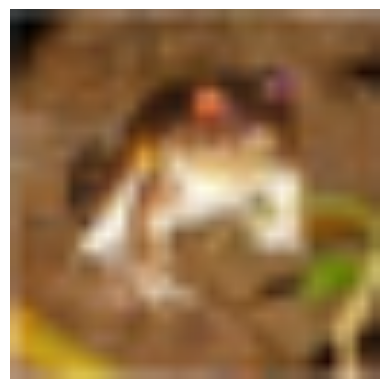

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# Denormalize the tensor and convert to PIL Image
# The normalization values used were (0.5, 0.5, 0.5) and (0.5, 0.5, 0.5)
# So, we can reverse this by multiplying by std and adding mean
img_np = img.numpy()
img_np = img_np * 0.5 + 0.5     # Denormalize
img_np = np.transpose(img_np, (1, 2, 0)) # Transpose from (C, H, W) to (H, W, C)

# Display the image using matplotlib
plt.imshow(img_np)
plt.axis('off') # Hide axes
plt.show()

In [7]:
from torchvision import transforms
from PIL import Image
import torch
import numpy as np

# Preprocessing
transform = transforms.Compose([
    transforms.ToPILImage(), # Convert tensor to PIL Image
    transforms.Resize(224),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

input_tensor = transform(img).unsqueeze(0)  # Add batch dimension

# Extract features
with torch.no_grad():
    features = feature_extractor(input_tensor)

In [8]:
print(features)

tensor([[[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
          [1.1146, 0.0000, 0.0000, 0.0000, 0.0000, 1.1324],
          [1.1146, 0.0000, 0.0000, 0.0000, 1.2404, 1.5671],
          [0.0000, 0.0000, 0.0000, 0.0000, 1.2404, 1.5671],
          [5.5600, 0.0000, 0.0000, 0.1040, 1.4879, 0.0000]],

         [[0.3187, 0.3187, 0.0000, 0.0000, 4.9215, 4.9215],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.2798, 2.3888]],

         [[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.4700],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
          [0.4510, 0.0000, 0.0000, 0.7128, 1.3620, 0.0000],
          [0.4510, 0.0000, 0.0000, 0.7128, 1.3620, 0.0000],
          [0.0000, 0.0000, 0.0000, 0

In [9]:
features.shape

torch.Size([1, 256, 6, 6])